In [1]:
import PLred.scene as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import importlib
importlib.reload(sc)

<module 'PLred.scene' from '/Users/yjkim/Documents/PLred/PLred/scene.py'>

In [3]:
wavs = np.load('/Users/yjkim/Documents/PLexperiments/data/visPL/2024-09-17/model_20240914_wavmap.npy')
rv_corr = 26.2 # km/s
star_rv = 22 # km/s

vc = 656.28 + (star_rv-rv_corr)/2.998e5*656.28
vgrid = (wavs[0] - vc) * 2.998e5 / 656.28
vgrid0 = vgrid[np.arange(100,116)]
vgrid = np.linspace(vgrid0[-1], vgrid0[0], len(vgrid0))

0.39097706687916817


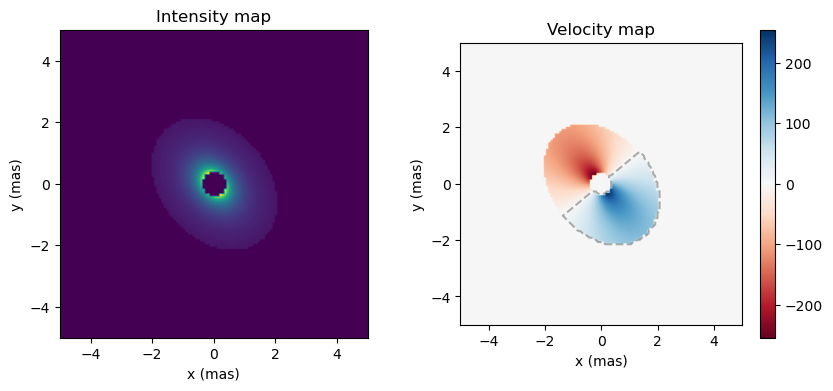

In [4]:
fov = 10
n_grid = 256 #128 #256 #128
vels = vgrid #np.linspace(-500, 500, 10)
# velzero = 656.4

dist = 49.6 #168 # pc
Rstar_rsun = 4.17 # Klement Rsun

RSUN_IN_1AU = 215.032

Vrot = 396 #550 # km/s # Klement
Rstar = Rstar_rsun / dist / RSUN_IN_1AU * 1e3 # stellar radius in mas

print(Rstar)
# disk_fwhm = 3.6 # mas
incl_angle = np.radians(43) # Klement
PA = np.radians(130)

# intenmap, velmap, xg, yg =sc.make_simple_gaussian_disk(Vrot, Rstar, disk_fwhm, incl_angle, PA, plot=True, fov = fov)
# isomap = sc.get_iso_velocity_map(intenmap, velmap, vels)

Rout = 2.4 #mas
power_index = -1.6
intenmap2, velmap2, xg, yg =sc.make_simple_powerlaw_disk(Vrot, Rstar, Rout, power_index, incl_angle, PA, plot=True, fov = fov)
isomap2 = sc.get_iso_velocity_map(intenmap2, velmap2, vels)

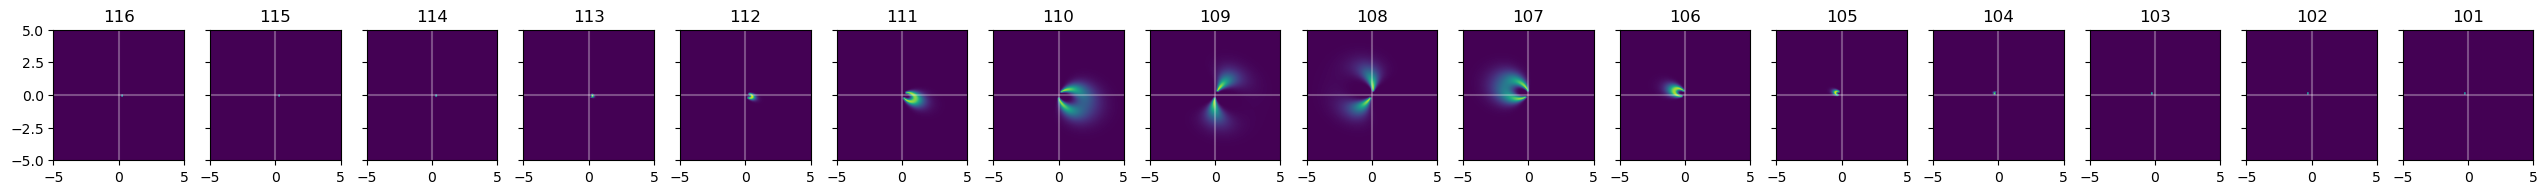

In [82]:
fig, axs = plt.subplots(ncols=len(vgrid), figsize=(len(vgrid)*2, 2), sharex=True, sharey=True)
for i in range(len(vgrid)):
    axs[i].imshow(isomap[i], extent=[-fov/2, fov/2, -fov/2, fov/2])
    axs[i].set_title(np.arange(116,100,-1)[i])
    axs[i].axhline(0, color='white', alpha=0.3)
    axs[i].axvline(0, color='white', alpha=0.3)

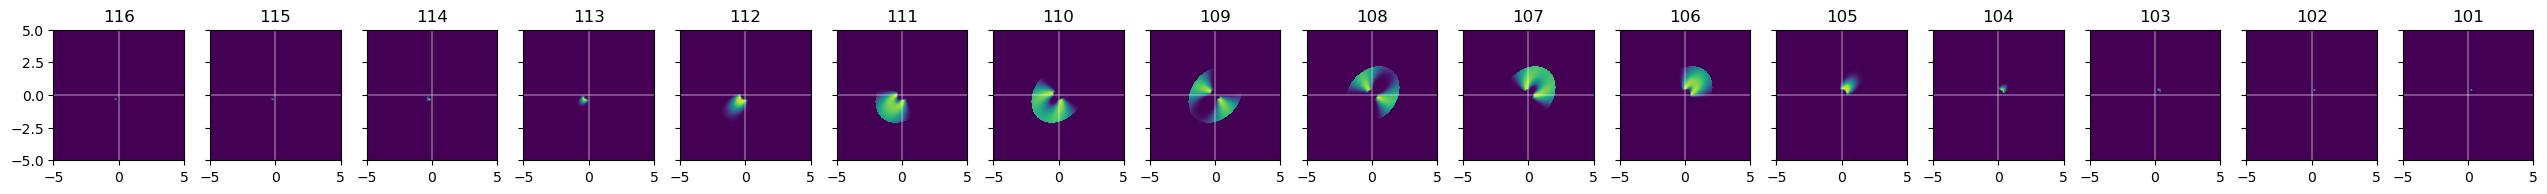

In [83]:
fig, axs = plt.subplots(ncols=len(vgrid), figsize=(len(vgrid)*2, 2), sharex=True, sharey=True)
for i in range(len(vgrid)):
    axs[i].imshow(np.log10(isomap2[i]+1e-4), extent=[-fov/2, fov/2, -fov/2, fov/2])
    axs[i].set_title(np.arange(116,100,-1)[i])
    axs[i].axhline(0, color='white', alpha=0.3)
    axs[i].axvline(0, color='white', alpha=0.3)

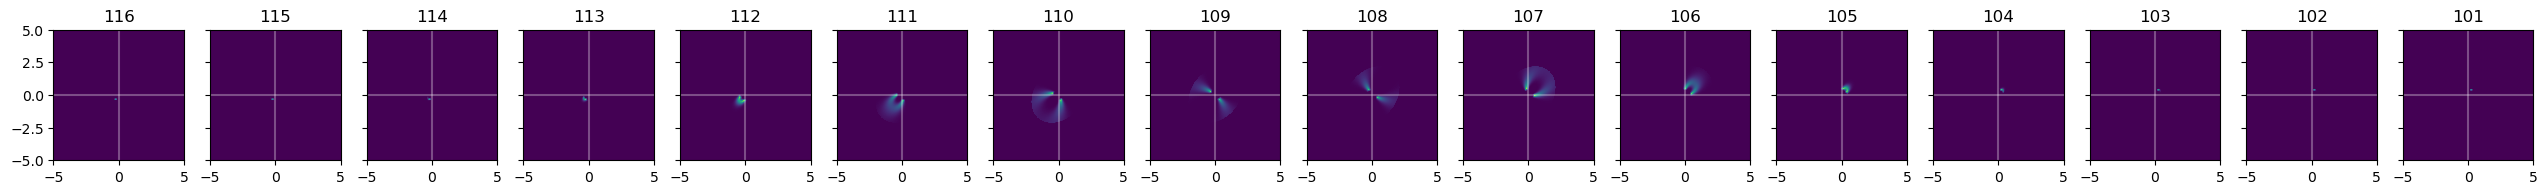

In [88]:
fig, axs = plt.subplots(ncols=len(vgrid), figsize=(len(vgrid)*2, 2), sharex=True, sharey=True)
for i in range(len(vgrid)):
    axs[i].imshow((isomap2[i]), extent=[-fov/2, fov/2, -fov/2, fov/2])
    axs[i].set_title(np.arange(116,100,-1)[i])
    axs[i].axhline(0, color='white', alpha=0.3)
    axs[i].axvline(0, color='white', alpha=0.3)

In [92]:
270/np.sin(43*np.pi/180)

395.8953801226987

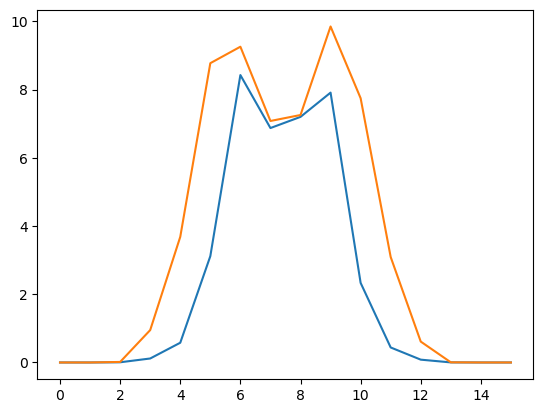

In [85]:
plt.plot(np.sum(isomap, axis=(1,2)))
plt.plot(np.sum(isomap2, axis=(1,2))*0.5)

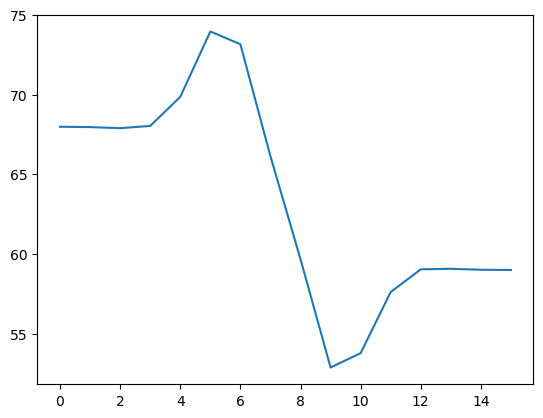

In [87]:
from scipy.ndimage import center_of_mass

# plt.plot([center_of_mass(i)[0] for i in isomap])
plt.plot([center_of_mass(i)[0] for i in isomap2])

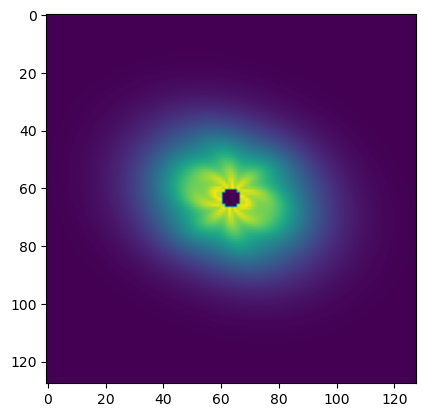

In [37]:
plt.imshow(np.sum(isomap,axis=0))

In [12]:
np.shape(isomap)

(50, 128, 128)

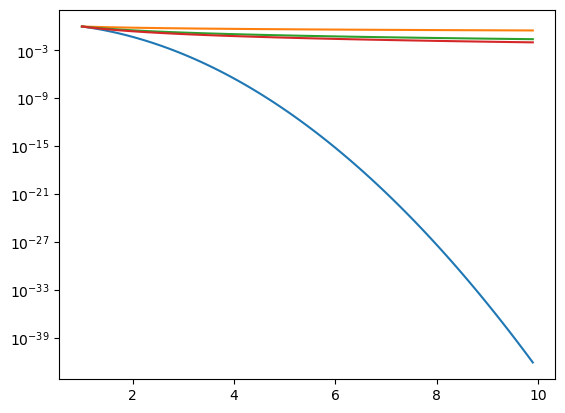

In [60]:
r = np.arange(1, 10, 0.1)
plt.semilogy(r, np.exp(-r**2) * np.exp(1))#/2/1**2)/np.sqrt(2*np.pi*1**2))
plt.semilogy(r, r**(-0.5))
plt.semilogy(r, r**(-1.6))
plt.semilogy(r, r**(-2))

In [5]:
from PLred import fit as fit
from PLred import imgrecon as imgrecon
import corner

In [6]:
import importlib
importlib.reload(fit)
importlib.reload(imgrecon)

<module 'PLred.imgrecon' from '/Users/yjkim/Documents/PLred/PLred/imgrecon.py'>

In [125]:
fitter = fit.PLMapFit(model_file = '/Users/yjkim/Documents/PLred/PLred/examples/example_model_couplingmap/betcmi_20240917_polymodel_14:55:00_15:10:00.fits',
                      image_ngrid = 64, image_fov = 10, n_trim = 1)

loading model


In [129]:
fibinds = np.arange(38)
for specind in np.arange(116,100,-1):
    fitter.make_matrix(specind, fibinds)
    fitter.save_matrix_to_file('/Volumes/T7 Touch/imgrecon_matrices/matrix_specind%d_ngrid64_fov10_t3.fits' % specind)

4096it [01:34, 43.18it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind115_ngrid64_fov10_t3.fits


4096it [01:25, 47.77it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind114_ngrid64_fov10_t3.fits


4096it [01:22, 49.52it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind113_ngrid64_fov10_t3.fits


4096it [01:17, 52.80it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind112_ngrid64_fov10_t3.fits


4096it [01:19, 51.61it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind111_ngrid64_fov10_t3.fits


4096it [01:18, 52.51it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind110_ngrid64_fov10_t3.fits


4096it [01:19, 51.55it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind109_ngrid64_fov10_t3.fits


4096it [01:19, 51.81it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind108_ngrid64_fov10_t3.fits


4096it [01:24, 48.46it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind107_ngrid64_fov10_t3.fits


4096it [01:19, 51.63it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind106_ngrid64_fov10_t3.fits


4096it [01:21, 50.28it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind105_ngrid64_fov10_t3.fits


4096it [01:19, 51.60it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind104_ngrid64_fov10_t3.fits


4096it [01:19, 51.24it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind103_ngrid64_fov10_t3.fits


4096it [01:17, 52.83it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind102_ngrid64_fov10_t3.fits


4096it [01:13, 55.76it/s]


all the fiber indices are used. saving the matrix to mat_full
Matrix saved to  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind101_ngrid64_fov10_t3.fits


In [7]:
timeind = 3
matrix_files = ['/Volumes/T7 Touch/imgrecon_matrices/matrix_specind%d_ngrid64_fov10_t3.fits' % specind for specind in np.arange(111,104,-1)]
fitter3 = fit.PolyPLMapFit(matrix_files = matrix_files)

loading model
Matrix loaded from  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind111_ngrid64_fov10_t3.fits specind 111
loading model
Matrix loaded from  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind110_ngrid64_fov10_t3.fits specind 110
loading model
Matrix loaded from  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind109_ngrid64_fov10_t3.fits specind 109
loading model
Matrix loaded from  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind108_ngrid64_fov10_t3.fits specind 108
loading model
Matrix loaded from  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind107_ngrid64_fov10_t3.fits specind 107
loading model
Matrix loaded from  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind106_ngrid64_fov10_t3.fits specind 106
loading model
Matrix loaded from  /Volumes/T7 Touch/imgrecon_matrices/matrix_specind105_ngrid64_fov10_t3.fits specind 105


In [50]:
np.shape(fitter3.mat)

(4, 4096, 6422)

In [8]:
fiber_inds = np.arange(38)
specinds = np.arange(111,104,-1)
fitter3.prepare_data_all(fiber_inds, specinds)

In [9]:
np.shape(fitter3.observeds)

(7, 6422)

In [10]:
centerfrac_file = '/Users/yjkim/Documents/OnskydemoPaper/results/stellar_flux_ratio.npz'
centerfracs = np.load(centerfrac_file)['stellar_flux_ratio']
wavinds = np.load(centerfrac_file)['wavinds']

point_source_fracs = np.zeros(len(specinds))
for i, specind in enumerate(specinds):
    point_source_fracs[i] = centerfracs[np.where(specind == wavinds)[0][0]]

print(point_source_fracs)

[0.559185   0.3986512  0.35605811 0.41991912 0.3710186  0.36381921
 0.43750683]


In [145]:
vgrid[112]

-205.70940345949427

In [146]:
vgrid[specinds]

array([-159.0724245 , -112.4367034 ,  -65.80223838,  -19.16902763,
         27.46293062,   74.09363819,  120.72309687])

In [11]:
fixed_params = {'Vrot': Vrot,
                'Rstar': Rstar,
                'Rout': Rout,
                'power_index': -1.6,
                # 'incl_angle': incl_angle,
                # 'PA': 2.2325, #PA,
                'beta': -0.5
                }

ini_params = {
            'PA': 2.2325,
              # 'power_index': -1.6,
            # 'Rout': Rout
            'incl_angle' : 0.564 #incl_angle,
            }

wavs = np.load('/Users/yjkim/Documents/PLexperiments/data/visPL/2024-09-17/model_20240914_wavmap.npy')
rv_corr = 26.2 # km/s
star_rv = 22 # km/s

vc = 656.28 + (star_rv-rv_corr)/2.998e5*656.28
vgrid = (wavs[0] - vc) * 2.998e5 / 656.28

vgrid_sampled = vgrid[specinds] #np.flip(vgrid[105:109])
vgrid_sampled = np.linspace(vgrid_sampled[0], vgrid_sampled[-1], len(vgrid_sampled))
# point_source_fracs = np.array([0.5, 0.5, 0.5, 0.5])

In [12]:


fitter3.run_mcmc_disk(fixed_params,
                      vgrid_sampled,
                      ini_params,
                      niter = 400,
                      apply_point_source_fraction=True,
                      point_source_fracs=point_source_fracs
                      )

100%|██████████| 400/400 [01:58<00:00,  3.38it/s]


In [13]:
fitter3.rc.disk_params

{'Vrot': 396,
 'Rstar': 0.39097706687916817,
 'Rout': 2.4,
 'power_index': -1.6,
 'incl_angle': 0.565773413958519,
 'PA': 2.1943126407319338,
 'beta': -0.5}

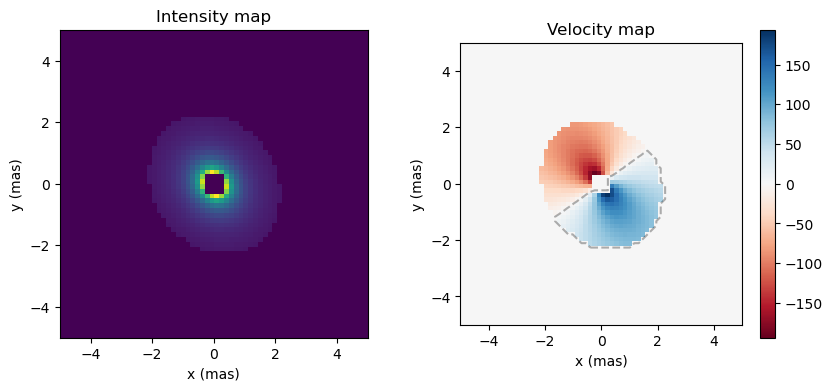

In [14]:
from PLred.scene import make_simple_powerlaw_disk, get_iso_velocity_map

intenmap, velmap, _, _ = make_simple_powerlaw_disk(fitter3.rc.disk_params['Vrot'],
                                                    fitter3.rc.disk_params['Rstar'],
                                                    fitter3.rc.disk_params['Rout'],
                                                    fitter3.rc.disk_params['power_index'],
                                                    fitter3.rc.disk_params['incl_angle'],
                                                    fitter3.rc.disk_params['PA'],
                                                    plot=True,
                                                    ngrid = 64,
                                                    fov = 10)
iso_map = get_iso_velocity_map(intenmap, velmap, fitter3.rc.vgrid)

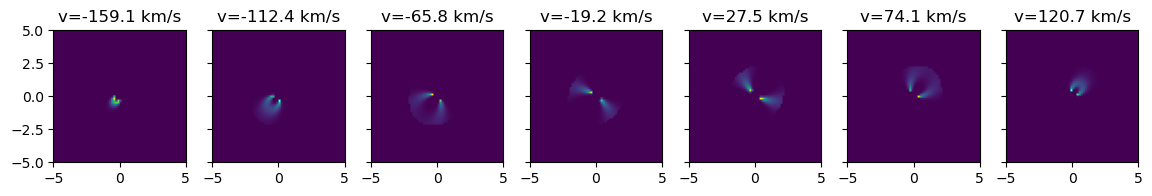

In [15]:
fig, axs = plt.subplots(ncols=len(fitter3.rc.vgrid), figsize=(len(fitter3.rc.vgrid)*2, 2), sharex=True, sharey=True)
for i in range(len(fitter3.rc.vgrid)):
    axs[i].imshow(iso_map[i], extent=[-5, 5, -5, 5])
    axs[i].set_title('v=%.1f km/s' % fitter3.rc.vgrid[i])


In [26]:
logprobs = fitter3.get_logprobs(discard=0)
chains = fitter3.get_chain(discard=100)

In [25]:
np.shape(chains)

(4000, 2)

In [27]:
final_params = np.average(chains, axis=0)

In [29]:
final_params

array([0.56088401, 2.19285224])

In [42]:
fitter3.rc.apply_point_source_fraction = True

ims = fitter3.get_images({'PA': final_params[1],
                          'incl_angle': final_params[0],})

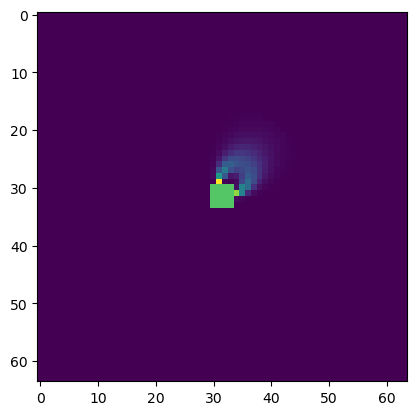

In [43]:
plt.imshow(ims[6])

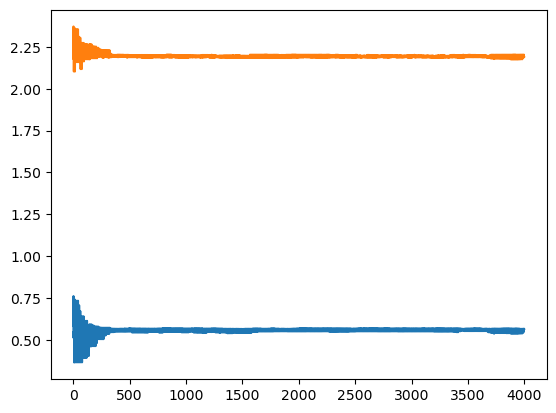

In [24]:
plt.plot(chains)

In [16]:
vgrid_sampled

array([-159.0724245 , -112.4398376 ,  -65.80725071,  -19.17466381,
         27.45792308,   74.09050997,  120.72309687])

In [13]:
fixed_params = {}

importlib.reload(imgrecon)
diskfitter = imgrecon.DiskFitter(fixed_params, vgrid_sampled,
                                 np.transpose(fitter3.mat, (0,2,1)),
                                 fitter3.observeds,
                                 fitter3.observed_errs,
                                 'disk_test',
                                 apply_point_source_fraction=True,
                                 point_source_fracs = point_source_fracs,
                                 axis_len = 64,
                                 image_fov = 10)

In [14]:
{'Vrot': 396,
 'Rstar': 0.39097706687916817,
 'Rout': 2.4,
 'power_index': -1.6,
 'incl_angle': 0.7504915783575618,
 'PA': 2.2689280275926285,
 'beta': 0.5}

{'Vrot': 396,
 'Rstar': 0.39097706687916817,
 'Rout': 2.4,
 'power_index': -1.6,
 'incl_angle': 0.7504915783575618,
 'PA': 2.2689280275926285,
 'beta': 0.5}

In [18]:
[Vrot, Rstar, Rout, power_index, incl_angle, PA, -0.5]

[396,
 0.39097706687916817,
 2.4,
 -1.6,
 0.7504915783575618,
 2.2689280275926285,
 -0.5]

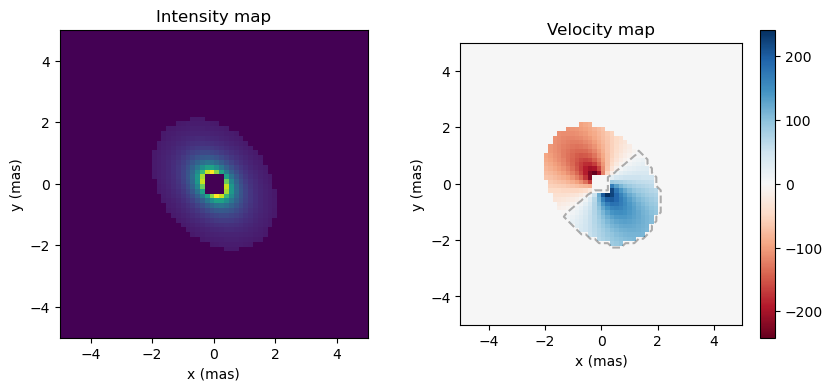

In [17]:
diskfitter.compute_disk([Vrot, Rstar, Rout, power_index, incl_angle, PA, -0.5], plot=True)
plt.show()

In [118]:
Vrot

396

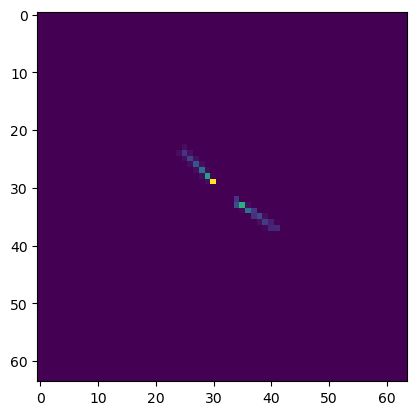

In [115]:
plt.imshow(diskfitter.compute_disk([Vrot, Rstar, Rout, power_index, incl_angle, PA, 0.5])[2])

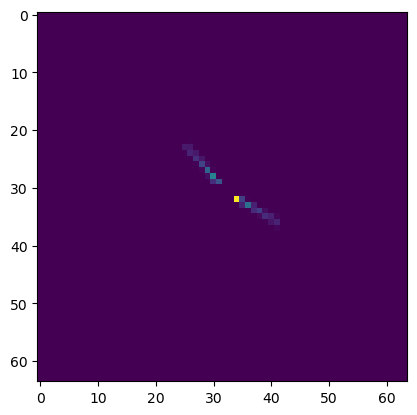

In [81]:
plt.imshow(fitter3.rc.compute_disk([PA])[3])

In [56]:
fitter3.rc.compute_disk([PA])[2][16,16]

0.0

In [57]:
out = _

In [58]:
np.shape(out)

()

In [87]:
np.shape(chain)

(1500, 10, 2)

In [88]:
PA

2.2689280275926285

In [89]:
chain[0]

array([[ 2.37952923, -1.55210567],
       [ 2.34805613, -1.65557303],
       [ 2.64906578, -1.31338872],
       [ 2.41562818, -1.57602448],
       [ 2.47690226, -1.47535653],
       [ 2.50071894, -1.72962211],
       [ 2.42749916, -1.57710871],
       [ 2.66461817, -1.47752431],
       [ 2.19983627, -1.63718425],
       [ 2.52414482, -1.56380506]])

In [179]:
logprob = fitter3.rc.sampler.get_log_prob()
chain = fitter3.rc.sampler.get_chain()


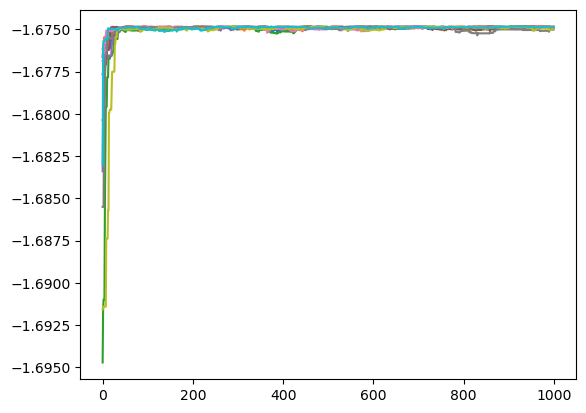

In [180]:
for i in range(10):
    plt.plot(logprob[:,i]/38/13**2 * 2 / len(specinds))

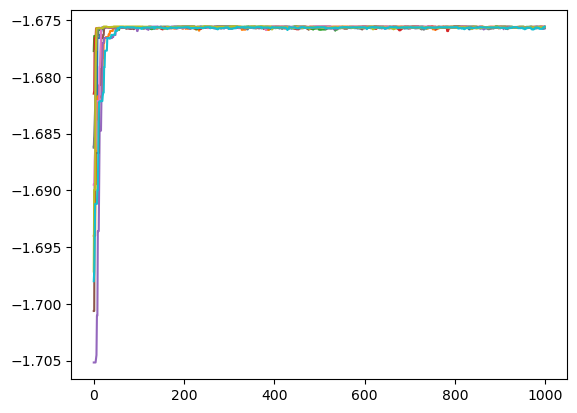

In [170]:
for i in range(10):
    plt.plot(logprob[:,i]/38/13**2 * 2 / len(specinds))

0.5638187868668937


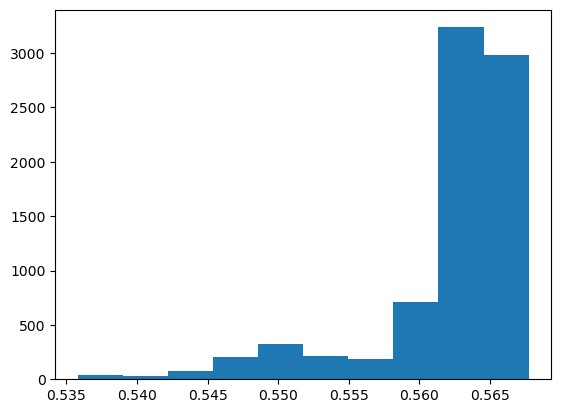

In [181]:
plt.hist(chain[200:,:,0].flatten())
print(np.median(chain[200:,:,0].flatten()))

In [194]:
fitter3.rc

In [173]:
incl_angle

0.7504915783575618

In [175]:
0.564 * 180/np.pi

32.31481964537843

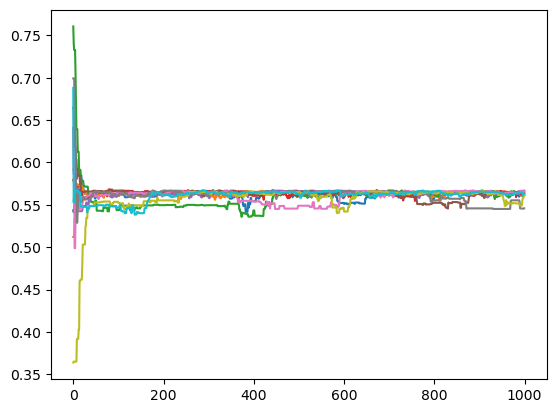

In [182]:
for i in range(10):
    plt.plot(chain[:,i,0])
# plt.plot(chain[:30,1,0])
# plt.ylim([2.23,2.234])

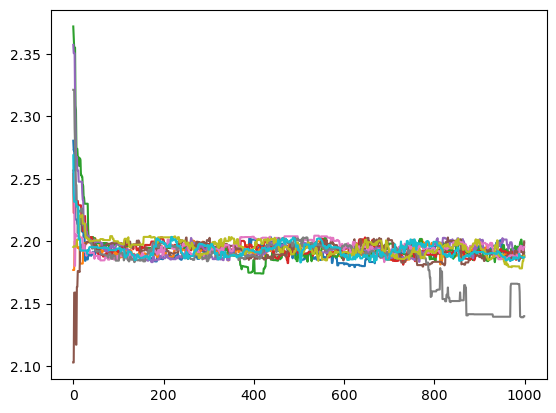

In [183]:
for i in range(10):
    plt.plot(chain[:,i,1])
# plt.plot(chain[:30,1,0])

In [192]:
ini_params

{'PA': 2.2325, 'incl_angle': 0.564}

In [114]:
2.08 * 180/np.pi

119.17522138721124

In [115]:
2*180/np.pi

114.59155902616465

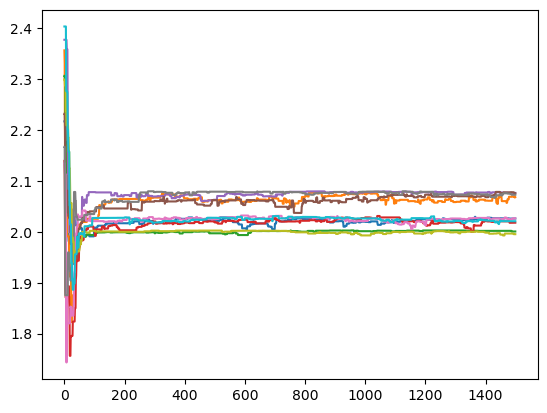

In [110]:
for i in range(10):
    plt.plot(chain[:,i,2])
# plt.plot(chain[:30,1,0])

In [190]:
flat_chain = fitter3.rc.sampler.get_chain(discard=0, flat=True)

2025-02-27 10:12:26,022 - WARNING - Too few points to create valid contours


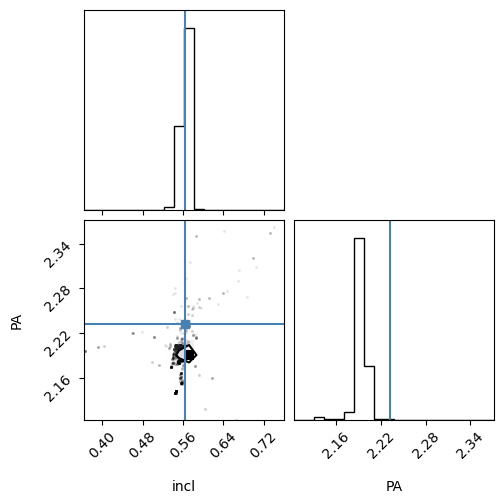

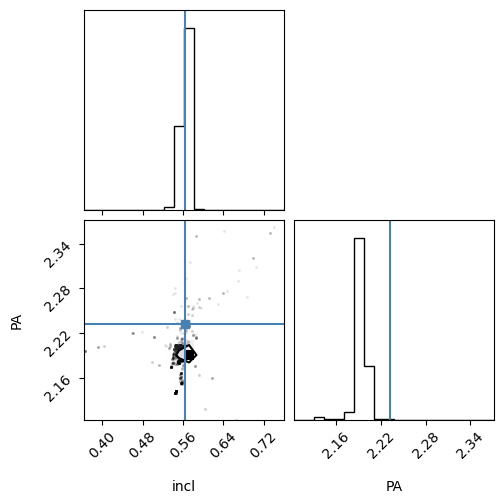

In [191]:
corner.corner(flat_chain, labels=['incl','PA'], truths=[ 0.564,2.2325])

In [ ]:

df = imgrecon.DiskFitter(fixed_params,
                    vgrid,
                    matrices,
                    data_list,
                    data_err_list,
                    outname,
                    apply_point_source_fraction=True,
                    point_source_fracs,
                    axis_len,
                    image_fov,
                    )

In [ ]:
fitter2 = fit.PLMapFit(matrix_file = '/Users/yjkim/Documents/OnskyDemoPaper/results/matrices/matrix_specind%d_ngrid33_t%d.fits' % (specind, timeind))
fitter2.prepare_data(fiber_inds)

In [ ]:
fiber_inds = np.arange(38)
timeind = 3

for specind in np.arange(111, 116):

    fitter2 = fit.PLMapFit(matrix_file = '/Users/yjkim/Documents/OnskyDemoPaper/results/matrices/matrix_specind%d_ngrid33_t%d.fits' % (specind, timeind))
    fitter2.prepare_data(fiber_inds)

    rc0 = fitter2.run_mcmc_pointsource(1, np.array([16,16]))
    x0 = np.average(rc0.sampler.get_chain(discard=100, flat=True)[:,1])
    y0 = np.average(rc0.sampler.get_chain(discard=100, flat=True)[:,0])

    rc = fitter2.run_mcmc_gaussian(np.array([x0,y0,1.5,2.5,0]), ini_ball_size=0.05, niter = 1000)
    chain = rc.sampler.get_chain(flat=True, discard=200)

    fig, axs = plt.subplots(nrows=6, figsize=(10,10))
    for i in range(10):
        for j in range(5): axs[j].plot(rc.sampler.get_chain()[:,i,j])
        axs[5].plot(rc.sampler.get_log_prob()[:,i]/13**2/38 * 2)
    fig.tight_layout()
    fig.savefig('gaussian_fitting_results/mcmc_specind%d_t%d.png' % (specind, timeind))

    fig = corner.corner(chain, labels=['x','y','sigx','sigy','theta'])
    fig.savefig('gaussian_fitting_results/corner_specind%d_t%d.png' % (specind, timeind))

    np.save('gaussian_fitting_results/chain_specind%d_t%d.npy' % (specind, timeind), chain)

    final_values = np.mean(chain, axis=0)

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    gauss = Gaussian2D(amplitude=1, x_mean=final_values[0], y_mean=final_values[1], 
                x_stddev=final_values[2], y_stddev=final_values[3],
                theta=final_values[4])

    xg, yg = np.meshgrid(np.arange(33), np.arange(33))
    ax.imshow(gauss(xg,yg))
    ax.set_title('logprob=%.3f,x=%.1f,y=%.1f,xs=%.1f,ys=%.1f,thet=%.1f' % (np.mean(rc.sampler.get_log_prob(flat=True, discard=200))/38/13**2 * 2, final_values[0], final_values[1], final_values[2], final_values[3], final_values[4]))
    fig.savefig('gaussian_fitting_results/image_specind%d_t%d.png' % (specind, timeind))